### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading Dataset

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


### 3. Understanding Data

#### 3.1 Surface-Level Dataset Check

 - Shape and Size
 - Columns Overview
 - Data Types
 - High-Level Summary
 - Descriptive Statistics

##### 3.1.1 Shape is understood because if it is too big, then we can sample it out for intensive operations  

In [4]:
df.shape

(891, 12)

##### 3.1.2 Column overview to see if it is needed to rename columns to follow snake_cases (all lowercase with underscores in btw) or semantic naming if they are not already

In [5]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

###### Renaming Columns - 7 Methods

##### 3.1.2.1 Using Regular Expressions with re.sub() - Advanced Pattern Matching

In [6]:
import re

In [7]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_',col).lower() for col in df.columns]

##### 3.1.2.2 Using .rename Method (Selective Renaming)
df.rename(columns={'OldColumnName':'NewColumnName','a':'b'})

##### 3.1.2.3 Renaming All Columns Using a List
df.columns = ['column1','column2']

##### 3.1.2.4 Using .set_axis() (Renaming all the columns)
df.set_axis(['newname','new_name2'], axis=1, inplace=True) 

###### 3.1.2.5 Using List Comprehension with str.replace() (Custom renaming Logic)
df.columns = [col.replace(' ','_') for col in df.columns]

or 

df.columns = [custom_function(col) for col in dfcolumns]

##### 3.1.2.6 Using map() with a Dictionary (Custom Mapping)
df.columns = df.columns.map(lamba x: x.lower().replace(' ', '_')

##### 3.1.2.7 Using .add_prefix() or .add_suffix()
df = df.add_prefix('prefix_') ---- adds a string to the beginning of every column name
df = df.add_suffix('_suffix') ---- adds a string to the end of every column name

##### 3.1.3 Data Types to see if any object types are having/hiding numerical data

In [8]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
name             object
sex              object
age             float64
sib_sp            int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
dtype: object

Here, we can add Sibsp and Parch to create 1 new feature called 'family_size' inplace of these 2 features where the passenger themselves would also be included
- Helps prevent Multi-collinearity
- Reduces feature Redundancy

And we can also encode the categorical variables:
Sex, Pclass, Embarked

###### Creating New Feature

In [9]:
df['family_size'] = df['sib_sp'] + df['parch'] + 1

In [10]:
df.drop(['sib_sp', 'parch'], axis = 1, inplace = True)
# axis=0 ---- Down Rows
# axis=1 ---- Across Columns ----- Drop these columns not rows

In [11]:
df.head()

,passenger_id,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


##### 3.1.4 Summary to understand non-null counts, data typesm memory usage
Essential for spotting missing data before diving deep

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   ticket        891 non-null    object 
 7   fare          891 non-null    float64
 8   cabin         204 non-null    object 
 9   embarked      889 non-null    object 
 10  family_size   891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


##### 3.1.5 Descriptive Statistics to understand:
- Distribution (mean, std, min, ,max)
- Unique Counts (for categoricals)
- Most Frequent Values (for mode detection)
- % of nulls (indirectly)

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
passenger_id,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2 Null and NaN Analysis

In [14]:
df.isnull().sum().sort_values(ascending = False)

cabin           687
age             177
embarked          2
passenger_id      0
survived          0
pclass            0
name              0
sex               0
ticket            0
fare              0
family_size       0
dtype: int64

In [15]:
df.isnull().mean()*100 # Percentage of Null Values

passenger_id     0.000000
survived         0.000000
pclass           0.000000
name             0.000000
sex              0.000000
age             19.865320
ticket           0.000000
fare             0.000000
cabin           77.104377
embarked         0.224467
family_size      0.000000
dtype: float64

#### 3.3 Check for Duplicates

In [16]:
df.duplicated().sum()

0

#### 3.4 Uniqueness & Cardinality

In [17]:
for col in df.columns:
    print(col, df[col].nunique())

passenger_id 891
survived 2
pclass 3
name 891
sex 2
age 88
ticket 681
fare 248
cabin 147
embarked 3
family_size 9


### 4. Handling Null Values 

- Visual Inspection of Missing Data
- Missing Data Correlation
- Missingness vs Feature Distribution (for numerical features)
- Imputing Missing values Using Basic Methods (mean, median, mode)
- Impute Missing values using Predictive Modeling (KNN or Random Forest)
- Drop Columns with Excessive Missing Values
- Little's MCAR Test (if applicable) - Placeholder

##### 4.1 Visual Inspection of Missing Data
To understand missingness Pattern in each DataFrame

<function matplotlib.pyplot.show(close=None, block=None)>

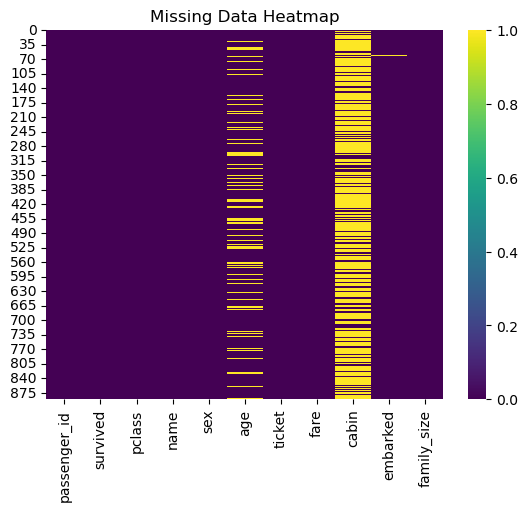

In [18]:
sns.heatmap(df.isnull(), cbar = True, cmap = 'viridis')
plt.title(f'Missing Data Heatmap')
plt.show

##### 4.2 Missing Data Correlation

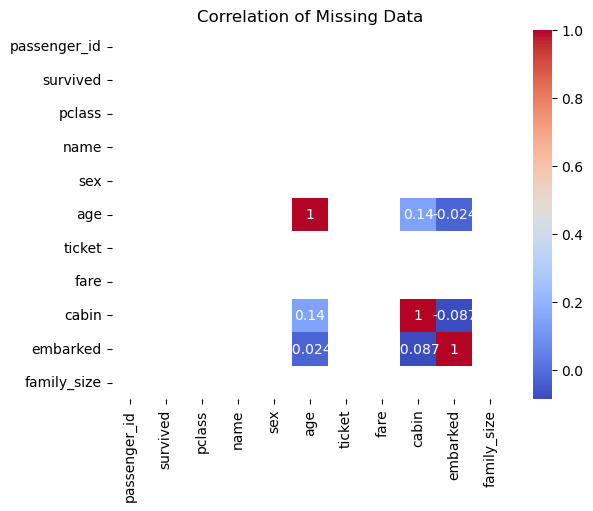

In [19]:
missing_corr = df.isnull().astype(int).corr()
sns.heatmap(missing_corr, cmap='coolwarm', annot=True)
plt.title('Correlation of Missing Data')
plt.show()

##### 4.3 Missingness vs Feature Distribution (for numerical features)

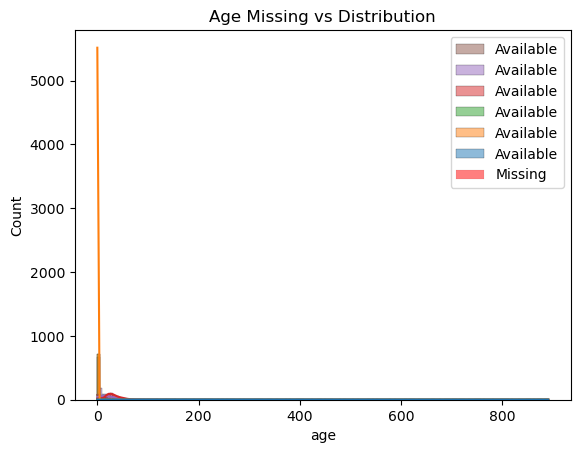

In [20]:
sns.histplot(df[df['age'].notnull()], color='blue', label='Available', kde=True)
sns.histplot(df[df['age'].isnull()]['age'], color='red', label='Missing', kde=True)
plt.legend()
plt.title( 'Age Missing vs Distribution')
plt.show()

##### 4.4 Imputing Missing values Using Basic Methods (mean, median, mode)

In [21]:
def basic_impute(df):
    
    df.drop(columns='cabin', inplace=True)
    
    # For numerical columns
    df['age'].fillna(df['age'].mean(), inplace = True)
    
    # For Categorical Columns
    df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
    return df

##### 4.5 Impute Missing values using Predictive Modeling (KNN or Random Forest)

In [22]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

In [23]:
def predictive_impute(df):
    
    
    # Example of KNN Imputer ---- Similarity based prediction
    
    knn_imputer = KNNImputer(n_neighbors=5)
    
    df[['age']] = knn_imputer.fit_transform(df[['age']])
    
    
    # Random Forest ---- Ensemble based regression/classification
    # Can be used for both numerical and categorical data
    
    rf_imputer = RandomForestRegressor(n_estimators=100, random_state=42)
    
    df['age'].fillna(df.groupby('pclass')['age'].transform('mean'), inplace=True)
    
    
    return df

##### Following all examples of predictice imputers, their usecases and caveats

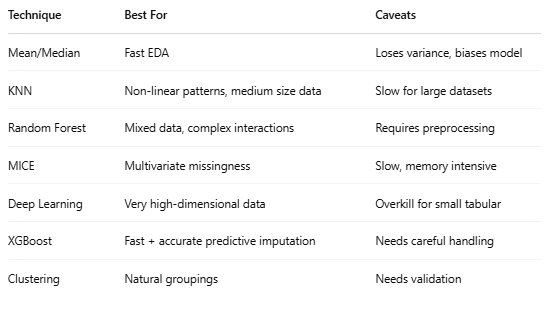

##### Applying the above two imputation steps to DataFrame

In [24]:
df1 = df.copy()
df2 = df.copy()

In [25]:
df1 = basic_impute(df1)

In [26]:
df1

,passenger_id,survived,pclass,name,sex,age,ticket,fare,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1


In [27]:
df2 = predictive_impute(df2)

In [28]:
df2.drop(columns='cabin', axis =1, inplace=True)

In [29]:
df2

,passenger_id,survived,pclass,name,sex,age,ticket,fare,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1


### 5. Converting Categorical Features into Numerical Features

- Label Encoding
- One-Hot Encoding
- Binary Encoding
- Ordinal Encoding
- Frequency Encoding
- Target Encoding
- Hashing Encoding
- Count Encoding

##### 5.1 Label Encoding

--> Good for ordinal [Categorical-With Order] variables or when you need unique integer labels

--> Converts each unique categorical value into a unique integer

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
def label_encoding(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

##### 5.2 One-Hot Encoding

 --> Creates separeate binary columns for each category of the original column
 
 --> Useful for nominal variables with no inherent order [Categorical - No order]

In [32]:
def one_hot_encoding(df,column):
    df = pd.get_dummies(df, columns = [column], drop_first=False)
    # drop_first=False to avoid Multi-collinearity
    return df

##### 5.3 Binary Encoding

--> Works well with high cardinality categories

--> Converts categories into binary code, then splits into columns

!pip install category_encoders

import category_encoders as ce

def binary_encoding(df, column):
    encoder = ce.BinaryEncoder(cols=[column])
    df = encoder.fit_transform(df)
    return df

##### 5.4 Ordinal Encoding

--> Perfect for ordered categories

--> Assigns numbers based on the order/rank of the categories

In [33]:
def ordinal_encoding(df, column, mapping):
    df[column] = df[column].map(mapping)
    return df

##### 5.5 Frequency Encoding

--> Replaces categories with how frequently they appear and applies normalization

--> Useful when categories have different frequencies and need a compact representation

In [34]:
def frequency_encoding(df, column):
    freq_map = df[column].value_counts() / len(df)
    df[column] = df[column].map(freq_map)
    return df

##### 5.6 Target Encoding (Mean Encoding)

--> Replaces categories with the mean of the target variable for each categpry

--> Best for improving model performance when there's a strong relationship with the target variable

In [35]:
def target_encoding(df, column, target):
    mean_encoded = df.groupby(column)[target].mean()
    df[column] = df[column].map(mean_encoded)
    return df

##### 5.7 Hashing Encoding (Hashing Trick)

--> Applies a hash function to categories to assign them into a fixed number of buckets 

--> Works well with high cardinality and can be used for text features

from sklearn.feature_extraction import FeatureHasher

def hashing_encoding(df, column, n_features):

    hasher = FeatureHasher(n_features=n_features, input_type='string')
    
    hashed_features = hasher.transform(df[column].astype(str))
    
    df_hashed = pd.DataFrame(hashed_features.toarray(), columns=[f'{column}_hashed_{i}' for i in range(n_features)])
    
    df = pd.concat([df, df_hashed], axis=1).drop(columns=[column])
    return df


##### 5.8 Count Encoding

--> Converts categories into number of times it appears in the data (very similar to fequency encoding, but without normalization)

--> Useful when you care about the frequency of categories

In [36]:
def count_encoding(df, column):
    count_map = df[column].value_counts()
    df[column] = df[column].map(count_map)
    return df

In [37]:
dff11 = df1.copy()
dff12 = df1.copy()

dff21 = df2.copy()
dff22 = df2.copy()

In [38]:
dff11 = one_hot_encoding(dff11, 'embarked')
dff11 = one_hot_encoding(dff11, 'sex')

In [39]:
dff12 = label_encoding(dff12, 'embarked')
dff12 = label_encoding(dff12, 'sex')

In [40]:
dff21 = one_hot_encoding(dff21, 'embarked')
dff21 = one_hot_encoding(dff21, 'sex')

In [41]:
dff22 = label_encoding(dff22, 'embarked')
dff22 = label_encoding(dff22, 'sex')

In [42]:
dff11.head(3)

,passenger_id,survived,pclass,name,age,ticket,fare,family_size,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,2,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,2,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,1,0


In [43]:
dff22.head(3)

,passenger_id,survived,pclass,name,sex,age,ticket,fare,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,2,1


In [44]:
df.head(3)

,passenger_id,survived,pclass,name,sex,age,ticket,fare,cabin,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1


### 6. Normalization [Scales btw 0 and 1]

#### 6.1 Min-Max Normalization

--> Scales features linearly to a fixed range, usually between 0 and 1

In [45]:
from sklearn.preprocessing import MinMaxScaler

def normalize_minmax(df, columns):
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[columns] = scaler.fit_transform(df[columns])
    return df_normalized

#### 6.2 MaxAbs Normalization

--> Scales features by their maximum absolute value, preserving sparsity and sign

In [46]:
from sklearn.preprocessing import MaxAbsScaler

def normalize_maxabs(df, columns):
    scaler = MaxAbsScaler()
    df_normalized = df.copy()
    df_normalized[columns] = scaler.fit_transform(df[columns])
    return df_normalized

#### 6.3 Quantile Normalization (Uniform)

--> Transforms features to follow a uniform distribution using quantile information

In [47]:
from sklearn.preprocessing import QuantileTransformer

def normalize_quantile_uniform(df, columns):
    transformer = QuantileTransformer(output_distribution='uniform')
    df_normalized = df.copy()
    df_normalized[columns] = transformer.fit_transform(df[columns])
    return df_normalized

### 7. Standardization Functions (center to mean = 0, std = 1)

#### 7.1 Z-Score Standardization

--> Centers features around mean 0 and scales them based on standard deviation

In [48]:
from sklearn.preprocessing import StandardScaler

def standardize_zscore(df, columns):
    scaler = StandardScaler()
    df_standardized = df.copy()
    df_standardized[columns] = scaler.fit_transform(df[columns])
    return df_standardized

#### 7.2 Robust Standardization (with medeian and IQR)

--> Uses median and interquartile range to scale features, robust to outliers

In [49]:
from sklearn.preprocessing import RobustScaler

def standardize_robust(df, columns):
    scaler = RobustScaler()
    df_standardized = df.copy()
    df_standardized[columns] = scaler.fit_transform(df[columns])
    return df_standardized

#### 7.3 Power Transformation (Yeo-Johnson)

--> Applies a non-linear transformation to make data more Gaussian-like

In [50]:
from sklearn.preprocessing import PowerTransformer

def standardize_power(df, columns):
    transformer = PowerTransformer(method='yeo-johnson')
    df_standardized = df.copy()
    df_standardized[columns] = transformer.fit_transform(df[columns])
    return df_standardized

--> But for the Titanic Dataset, there is no need for standardization. Because:
- Most features are categorical → one-hot encoded, already on the same scale.
- Tree-based models (e.g., Random Forest, XGBoost) don't require scaling — they split on thresholds, not distances.
- Very few numerical features (age, fare, family_size) — impact is limited.
- Scaling is only necessary for distance/gradient-based models like:
    - Logistic Regression
    - SVM
    - K-Nearest Neighbors (KNN)
    - Neural Networks
- Conclusion: Not required unless using scale-sensitive models.

### 8. Outlier Handling 

#### 8.1 Detecting Outliers

#### 8.1.1 Statistical Methods
- Box Plot (IQR Method)
- Z-score Method
- Modified Z-score Method

#### 8.1.2 Visualization Methods
- Box Plot
- Violin Plot 
- Scatter Plot

#### 8.1.1 Statistical Methods

#### 8.1.1.1 Box Plot (IQR Method)

- Uses the IQR to detect values that are too far from the middle 50% of the data

In [51]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

#### 8.1.1.2 Z-score Method

- Measures how many standard deviations a value is from the mean

In [52]:
from scipy.stats import zscore

def detect_outliers_z(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[(abs(z_scores) > threshold)]

#### 8.1.1.3 Modified Z-score Method

- A robust alternative to z-score using median and MAD (Mean Absolute Deviation)

In [53]:
import numpy as np

def detect_outliers_modified_z(df, column, threshold=3.5):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    modified_z = 0.6745 * (df[column] - median) / mad
    return df[modified_z.abs() > threshold]

#### 8.1.2 Visualization Methods

#### 8.1.2.1 Box Plot

- Shows Q1, Q3, median, and Outliers as points outside whiskers

Text(0.5, 1.0, 'Boxplot - Age')

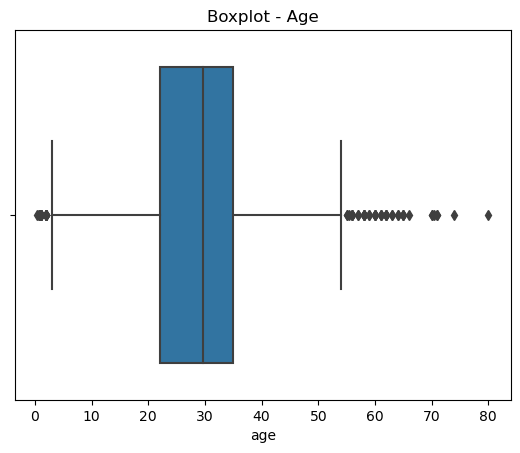

In [54]:
sns.boxplot(x=dff11['age'])
plt.title('Boxplot - Age')

#### 8.1.2.2 Violin Plot

- Combines a box plot + KDE (Distribution shape)

<Axes: xlabel='fare'>

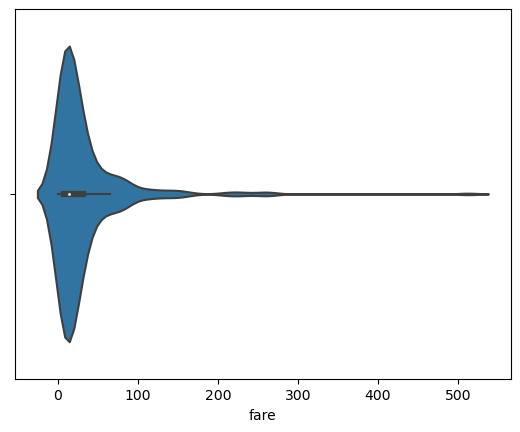

In [55]:
sns.violinplot(x=dff11['fare'])

#### 8.1.2.3 Scatter Plot (for multivariate)

- Plots two variables to identify extremw values or patterns 

<Axes: xlabel='age', ylabel='fare'>

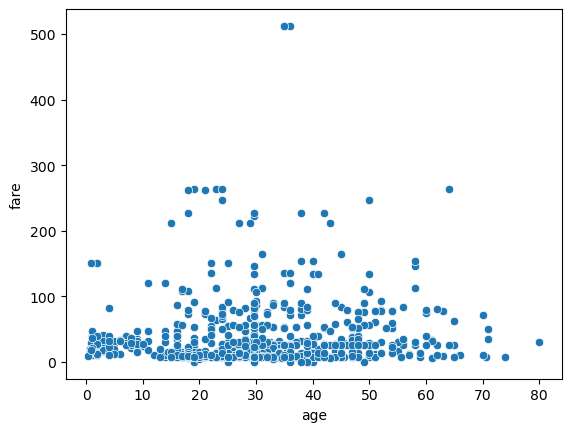

In [56]:
sns.scatterplot(x='age', y='fare', data=dff11)

#### 8.2 Handling Outliers

#### 8.2.1 Capping (Winsorization)
- Percentile-based capping
- IQR-based capping
- Standard deviation capping

#### 8.2.2 Transformation Techniques
- Log Transformation
- Square Root Transformation
- Box-Cox Transformation
- Yeo-Johnson Transformation

#### 8.2.3 Robust Statistical Methods
- Replace with Robust Metrics
- Robust scaling
- Quantile-based analysis

#### 8.2.4 Model-Based Approaches
- Isolation Forest
- Local Outlier Factor
- One-class SVM
- DBSCAN clustering

#### 8.2.5 Binning/Discretization
- Equal-width binning
- Equal-frequency binning
- Custom binning

#### 8.2.6 Custom Imputation for Outliers
- Regression-based Imputation
- KNN Imputation for outliers

#### 8.2.7 Separate Modeling
- Create outlier indicators
- Startified modeling
- Weighted modeling

#### 8.2.8 Robust Loss Functions
- Use Huber oss or Quantile regression when training models
- Those loss funcitons are inherently less sensitive to outliers

#### 8.2.9 Ensemble Methods
- Many tree based methods (Random Forest, XGBoost) are naturally robust to outliers
- Consider using these algorithms if outliers can not be relaibly removed

#### 8.2.1 Capping (Winsorization)

#### 8.2.1.1 Percentile-based capping 

- lower_percentile : float, default=0.05
- The lower percentile threshold
    
- upper_percentile : float, default=0.95
- The upper percentile threshold

In [57]:
def percentile_based_capping(df, column, lower_percentile=0.05, upper_percentile=0.95):
    
    df_copy = df.copy()
    lower_bound = df_copy[column].quantile(lower_percentile)
    upper_bound = df_copy[column].quantile(upper_percentile)
    
    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_copy

#### 8.2.1.2 IQR-based capping

- iqr_multiplier : float, default=1.5
- Multiplier for IQR to define boundaries

In [58]:
def iqr_based_capping(df, column, iqr_multiplier=1.5):
    
    df_copy = df.copy()
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_copy

#### 8.2.1.3 Standard deviation capping

- std_multiplier : float, default=3
- Number of standard deviations to use as threshold

In [59]:
def std_dev_capping(df, column, std_multiplier=3):
    
    df_copy = df.copy()
    mean = df_copy[column].mean()
    std = df_copy[column].std()
    
    lower_bound = mean - std_multiplier * std
    upper_bound = mean + std_multiplier * std
    
    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_copy

#### 8.2.2 Transformation Techniques

#### 8.2.2.1 Log Transformation

- offset : float, default=1
- Value to add before taking log (for handling zeros or negative values

In [60]:
def log_transformation(df, column, offset=1):
   
    df_copy = df.copy()
    
    # Check for non-positive values
    min_val = df_copy[column].min()
    if min_val <= 0:
        offset = abs(min_val) + offset
    
    df_copy[f"{column}_log"] = np.log(df_copy[column] + offset)
    
    return df_copy

#### 8.2.2.2 Square Root Transformation

- offset : float, default=0
- Value to add before taking sqrt (for handling negative values)

In [61]:
def sqrt_transformation(df, column, offset=0):
    
    df_copy = df.copy()
    
    # Check for negative values
    min_val = df_copy[column].min()
    if min_val < 0:
        offset = abs(min_val) + offset
    
    df_copy[f"{column}_sqrt"] = np.sqrt(df_copy[column] + offset)
    
    return df_copy

#### 8.2.2.3 Box-Cox Transformation

In [62]:
def boxcox_transformation(df, column):
    
    df_copy = df.copy()
    
    # Box-Cox requires all values to be positive
    min_val = df_copy[column].min()
    offset = 0
    if min_val <= 0:
        offset = abs(min_val) + 1
    
    transformed_data, lambda_value = stats.boxcox(df_copy[column] + offset)
    df_copy[f"{column}_boxcox"] = transformed_data
    
    return df_copy, lambda_value

#### 8.2.2.4 Yeo-Johnson Transformation

In [63]:
def yeojohnson_transformation(df, column):
   
    df_copy = df.copy()
    
    transformed_data, lambda_value = stats.yeojohnson(df_copy[column])
    df_copy[f"{column}_yeojohnson"] = transformed_data
    
    return df_copy, lambda_value

#### 8.2.3 Robust Statistical Methods

#### 8.2.3.1 Replace with Robust Metrics

In [64]:
def replace_with_robust_metrics(df, column):
  
    median = df[column].median()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # For comparison
    mean = df[column].mean()
    std = df[column].std()
    
    robust_metrics = {
        'median': median,
        'iqr': iqr,
        'mean': mean,
        'std': std,
        'lower_whisker': max(df[column].min(), q1 - 1.5 * iqr),
        'upper_whisker': min(df[column].max(), q3 + 1.5 * iqr)
    }
    
    return robust_metrics

#### 8.2.3.2 Robust scaling

In [65]:
def robust_scaling(df, columns):
 
    df_copy = df.copy()
    
    scaler = RobustScaler()
    df_copy[columns] = scaler.fit_transform(df_copy[columns])
    
    return df_copy

#### 8.2.3.3 Quantile-based analysis

- quantiles : list, default=[0.05, 0.25, 0.5, 0.75, 0.95]
- List of quantiles to compute

In [66]:
def quantile_based_analysis(df, column, quantiles=[0.05, 0.25, 0.5, 0.75, 0.95]):
   
    quantile_values = {}
    
    for q in quantiles:
        quantile_values[f'q{int(q*100)}'] = df[column].quantile(q)
    
    # Add interquartile ranges
    quantile_values['iqr_25_75'] = quantile_values['q75'] - quantile_values['q25']
    quantile_values['iqr_5_95'] = quantile_values['q95'] - quantile_values['q5']
    
    return quantile_value

#### 8.2.4 Machine Learning Based Methods¶

#### 8.2.4.1 Isolation Forest (Best for large datasets)

- Randomly Splits data, outliers get isolated faster

- Here, contamination is the expected proportion of outliers in the dataset
- It tells the model how many points it should consider as anomalies

- The model assigns anomaly scores to all points
- Then it selects the top N% (based on scores) as outliers, where N=Contamination=5%

In [67]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(df, features):
    model = IsolationForest(contamination=0.05)
    df['anomaly'] = model.fit_predict(df[features])
    return df[df['anomaly'] == -1]

#### 8.2.4.2 Local Outlier Factor (LOF)

- Compares the local density of a point to its neighbors

In [68]:
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers_lof(df, features):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    df['anomaly'] = lof.fit_predict(df[features])
    return df[df['anomaly'] == -1]

#### 8.2.4.3 One-class SVM

- nu : float, default=0.05
- Upper bound on the fraction of training errors

- kernel : str, default='rbf'
- Kernel type for SVM

In [69]:
def one_class_svm_outliers(df, columns, nu=0.05, kernel='rbf'):
    
    df_copy = df.copy()
    
    # Scale data for SVM
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_copy[columns])
    
    # One-Class SVM model
    ocsvm = OneClassSVM(nu=nu, kernel=kernel)
    
    # Fit and predict
    df_copy['ocsvm_outlier'] = ocsvm.fit_predict(scaled_data)
    # Convert to binary indicator where -1 = outlier, 1 = inlier
    df_copy['ocsvm_outlier'] = df_copy['ocsvm_outlier'].map({1: 0, -1: 1})
    
    # Get anomaly scores
    df_copy['ocsvm_score'] = -ocsvm.decision_function(scaled_data)
    
    return df_copy

#### 8.2.4.4 DBSCAN Clustering (Density-based)

- Groups dense areas, anything not belonging to any cluster is an outlier

- Here, 'eps' is epsilon: It's the maximum distance between two points for them to be considered as neighbors

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def detect_outliers_dbscan(df, features):
    scaled = StandardScaler().fit_transform(df[features])
    db = DBSCAN(eps=0.5, min_samples=5).fit(scaled)
    df['cluster'] = db.labels_
    return df[df['cluster'] == -1]

#### 8.2.5 Binning/Discretization

#### 8.2.5.1 Equal-width binning

- bins : int, default=10
- Number of bins to create

- labels : list, default=None
- Labels for the bins

In [71]:
def equal_width_binning(df, column, bins=10, labels=None):
    
    df_copy = df.copy()
    
    df_copy[f"{column}_bin_width"] = pd.cut(df_copy[column], bins=bins, labels=labels)
    
    return df_copy

#### 8.2.5.2 Equal-frequency binning

- q : int, default=10
- Number of quantiles to create

In [72]:
def equal_frequency_binning(df, column, q=10, labels=None):
    
    df_copy = df.copy()
    
    df_copy[f"{column}_bin_freq"] = pd.qcut(df_copy[column], q=q, labels=labels, duplicates='drop')
    
    return df_copy

#### 8.2.5.3 Custom binning

- bin_edges : list
- mList of bin edges including minimum and maximum values

In [73]:
def custom_binning(df, column, bin_edges, labels=None):
   
    df_copy = df.copy()
    
    df_copy[f"{column}_bin_custom"] = pd.cut(df_copy[column], bins=bin_edges, labels=labels)
    
    return df_copy

#### 8.2.6 Custom Imputation for Outliers

#### 8.2.6.1 Regression-based Imputation

In [74]:
def regression_based_imputation(df, target_column, feature_columns, outlier_indices):
    
    """"
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    target_column : str
        The column containing outliers to impute
    feature_columns : list
        List of columns to use as predictors
    outlier_indices : list or array
        Indices of outliers to impute

    """
    df_copy = df.copy()
    
    # Separate non-outlier data for training
    mask = ~df_copy.index.isin(outlier_indices)
    X_train = df_copy.loc[mask, feature_columns]
    y_train = df_copy.loc[mask, target_column]
    
    # Data to predict on (the outliers)
    X_predict = df_copy.loc[outlier_indices, feature_columns]
    
    # Train model (using HuberRegressor for robustness)
    model = HuberRegressor(epsilon=1.35)
    model.fit(X_train, y_train)
    
    # Predict and replace outliers
    y_pred = model.predict(X_predict)
    df_copy.loc[outlier_indices, f"{target_column}_reg_imputed"] = y_pred
    
    return df_copy

#### 8.2.6.2 KNN Imputation for outliers

In [75]:
def knn_imputation_for_outliers(df, target_column, feature_columns, outlier_indices, n_neighbors=5):
    """
    Impute outliers using predictions from a KNN regression model.
    
    Parameters:
    -----------
    target_column : str
        The column containing outliers to impute
    feature_columns : list
        List of columns to use as predictors
    outlier_indices : list or array
        Indices of outliers to impute
    n_neighbors : int, default=5
        Number of neighbors to use for KNN
 
    """
    df_copy = df.copy()
    
    # Scale features for KNN
    scaler = StandardScaler()
    
    # Separate non-outlier data for training
    mask = ~df_copy.index.isin(outlier_indices)
    X_train = scaler.fit_transform(df_copy.loc[mask, feature_columns])
    y_train = df_copy.loc[mask, target_column]
    
    # Data to predict on (the outliers)
    X_predict = scaler.transform(df_copy.loc[outlier_indices, feature_columns])
    
    # Train KNN model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Predict and replace outliers
    y_pred = knn.predict(X_predict)
    df_copy.loc[outlier_indices, f"{target_column}_knn_imputed"] = y_pred
    
    return df_copy

#### 8.2.7 Separate Modeling

#### 8.2.7.1 Create outlier indicators

In [76]:
def create_outlier_indicators(df, column, method='iqr', **method_params):
    """
    Create binary indicators for outliers in a column.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    column : str
        The column to check for outliers
    method : str, default='iqr'
        Method to use for outlier detection ('iqr', 'zscore', or 'percentile')
    method_params : dict
        Parameters for the chosen method
     
    """
    df_copy = df.copy()
    
    if method == 'iqr':
        # Default IQR parameters
        iqr_multiplier = method_params.get('iqr_multiplier', 1.5)
        
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        
        df_copy[f"{column}_outlier"] = ((df_copy[column] < lower_bound) | 
                                        (df_copy[column] > upper_bound)).astype(int)
    
    elif method == 'zscore':
        # Default z-score parameters
        z_threshold = method_params.get('z_threshold', 3)
        
        mean = df_copy[column].mean()
        std = df_copy[column].std()
        
        z_scores = (df_copy[column] - mean) / std
        df_copy[f"{column}_outlier"] = (abs(z_scores) > z_threshold).astype(int)
    
    elif method == 'percentile':
        # Default percentile parameters
        lower_percentile = method_params.get('lower_percentile', 0.05)
        upper_percentile = method_params.get('upper_percentile', 0.95)
        
        lower_bound = df_copy[column].quantile(lower_percentile)
        upper_bound = df_copy[column].quantile(upper_percentile)
        
        df_copy[f"{column}_outlier"] = ((df_copy[column] < lower_bound) | 
                                        (df_copy[column] > upper_bound)).astype(int)
    
    return df_copy

#### 8.2.7.2 Startified modeling

In [77]:
def stratified_modeling_prep(df, column, outlier_column):
    """
    Prepare data for stratified modeling by separating normal and outlier data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    column : str
        The column to model
    outlier_column : str
        The column indicating outliers (0 for normal, 1 for outlier)
        
    Returns:
    --------
    tuple
        (normal_data, outlier_data) dataframes
    """
    # Separate normal and outlier data
    normal_data = df[df[outlier_column] == 0].copy()
    outlier_data = df[df[outlier_column] == 1].copy()
    
    return normal_data, outlier_data

#### 8.2.7.3 Weighted modeling

In [78]:
def weighted_modeling_prep(df, column, outlier_column, normal_weight=1.0, outlier_weight=0.5):
    """
    Prepare weights for weighted modeling with lower weights for outliers.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    column : str
        The column to model
    outlier_column : str
        The column indicating outliers (0 for normal, 1 for outlier)
    normal_weight : float, default=1.0
        Weight to assign to normal observations
    outlier_weight : float, default=0.5
        Weight to assign to outlier observations
        
    Returns:
    --------
    pandas.Series
        Series of weights for each observation
    """
    # Create weights based on outlier status
    weights = pd.Series(normal_weight, index=df.index)
    weights[df[outlier_column] == 1] = outlier_weight
    
    return weights

#### Example of combining multiple strategies

In [79]:
# Example of combining multiple strategies
def handle_outliers_comprehensive(df, column, strategy='capping', **kwargs):
    """
    Comprehensive function to handle outliers using different strategies.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    column : str
        The column to handle outliers in
    strategy : str, default='capping'
        Strategy to use: 'capping', 'transformation', 'removal', or 'imputation'
    kwargs : dict
        Additional parameters for the chosen strategy
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with handled outliers
    """
    df_copy = df.copy()
    
    if strategy == 'capping':
        method = kwargs.get('method', 'iqr')
        
        if method == 'iqr':
            df_copy = iqr_based_capping(df_copy, column, kwargs.get('iqr_multiplier', 1.5))
        elif method == 'percentile':
            df_copy = percentile_based_capping(df_copy, column, 
                                              kwargs.get('lower_percentile', 0.05),
                                              kwargs.get('upper_percentile', 0.95))
        elif method == 'std':
            df_copy = std_dev_capping(df_copy, column, kwargs.get('std_multiplier', 3))
            
    elif strategy == 'transformation':
        method = kwargs.get('method', 'log')
        
        if method == 'log':
            df_copy = log_transformation(df_copy, column, kwargs.get('offset', 1))
        elif method == 'sqrt':
            df_copy = sqrt_transformation(df_copy, column, kwargs.get('offset', 0))
        elif method == 'boxcox':
            df_copy, _ = boxcox_transformation(df_copy, column)
        elif method == 'yeojohnson':
            df_copy, _ = yeojohnson_transformation(df_copy, column)
            
    elif strategy == 'removal':
        method = kwargs.get('method', 'iqr')
        
        # First, identify outliers
        if method == 'iqr':
            Q1 = df_copy[column].quantile(0.25)
            Q3 = df_copy[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - kwargs.get('iqr_multiplier', 1.5) * IQR
            upper_bound = Q3 + kwargs.get('iqr_multiplier', 1.5) * IQR
            df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
            
        elif method == 'zscore':
            z_threshold = kwargs.get('z_threshold', 3)
            mean = df_copy[column].mean()
            std = df_copy[column].std()
            z_scores = (df_copy[column] - mean) / std
            df_copy = df_copy[abs(z_scores) <= z_threshold]
            
        elif method == 'model':
            # Use IsolationForest for model-based outlier removal
            features = kwargs.get('features', [column])
            contamination = kwargs.get('contamination', 0.05)
            
            iso_forest = IsolationForest(contamination=contamination, random_state=42)
            outliers = iso_forest.fit_predict(df_copy[features])
            df_copy = df_copy[outliers == 1]  # Keep only inliers
            
    elif strategy == 'imputation':
        method = kwargs.get('method', 'mean')
        
        # First, identify outliers using IQR method
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - kwargs.get('iqr_multiplier', 1.5) * IQR
        upper_bound = Q3 + kwargs.get('iqr_multiplier', 1.5) * IQR
        
        outlier_mask = (df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)
        outlier_indices = df_copy[outlier_mask].index
        
        if method == 'mean':
            df_copy.loc[outlier_indices, column] = df_copy[~outlier_mask][column].mean()
        elif method == 'median':
            df_copy.loc[outlier_indices, column] = df_copy[~outlier_mask][column].median()
        elif method == 'knn':
            features = kwargs.get('features', [c for c in df_copy.columns if c != column])
            n_neighbors = kwargs.get('n_neighbors', 5)
            
            df_imputed = knn_imputation_for_outliers(df_copy, column, features, outlier_indices, n_neighbors)
            df_copy.loc[outlier_indices, column] = df_imputed.loc[outlier_indices, f"{column}_knn_imputed"]
        elif method == 'regression':
            features = kwargs.get('features', [c for c in df_copy.columns if c != column])
            
            df_imputed = regression_based_imputation(df_copy, column, features, outlier_indices)
            df_copy.loc[outlier_indices, column] = df_imputed.loc[outlier_indices, f"{column}_reg_imputed"]
    
    return df_copy

In [80]:
# Drop outliers from specific numeric columns
dff11 = iqr_based_capping(dff11, 'age', iqr_multiplier=1.5)
dff11 = iqr_based_capping(dff11, 'fare', iqr_multiplier=1.5)
dff11 = iqr_based_capping(dff11, 'family_size', iqr_multiplier=1.5)

Text(0.5, 1.0, 'Boxplot - Age')

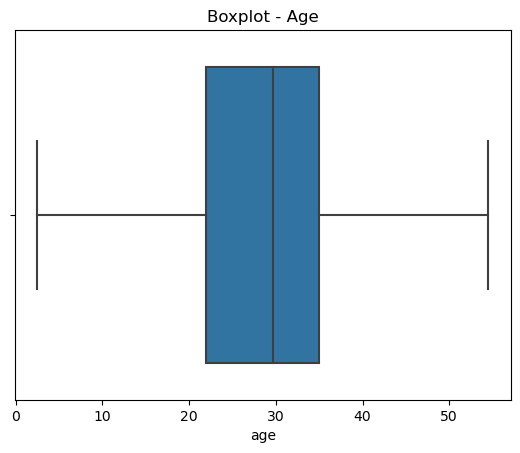

In [81]:
sns.boxplot(x=dff11['age'])
plt.title('Boxplot - Age')

Text(0.5, 1.0, 'Boxplot - fare')

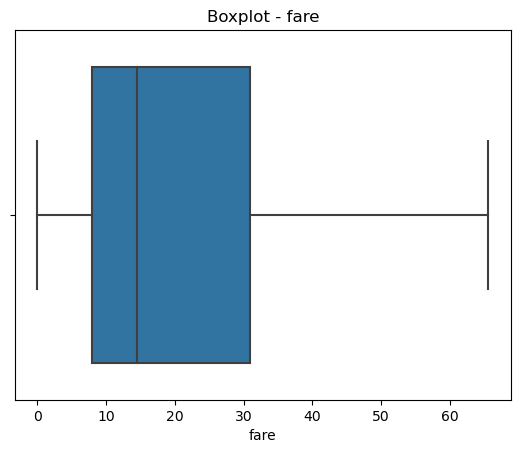

In [82]:
sns.boxplot(x=dff11['fare'])
plt.title('Boxplot - fare')

Text(0.5, 1.0, 'Boxplot - family_size')

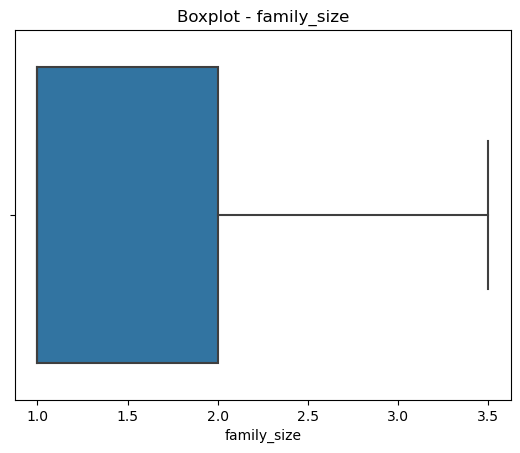

In [83]:
sns.boxplot(x=dff11['family_size'])
plt.title('Boxplot - family_size')

- From this, we can understand that all outliers have been handled